# Problem statement

> Here, using the data provided about passengers of Titanic, we've to predicit whether the passenger was survived the accident(titanic crash) or not.

# Data

> Data for this prediction model(Classification) is taken from the kaggle "Titanic - Machine Learning for Disaster" competition dataset : https://www.kaggle.com/c/titanic/data


In [1]:
## Let's import the required tools

#Regular tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ML models(scikit-learn)
from sklearn.ensemble import RandomForestClassifier


# Model evaluation tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv('data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
## Let's analyze the target values
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

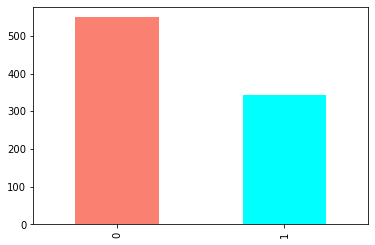

In [5]:
df['Survived'].value_counts().plot(kind='bar', color=['salmon', 'cyan']);

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df['Sex'].value_counts() 

male      577
female    314
Name: Sex, dtype: int64

In [8]:
### Let's compare sex column with target
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


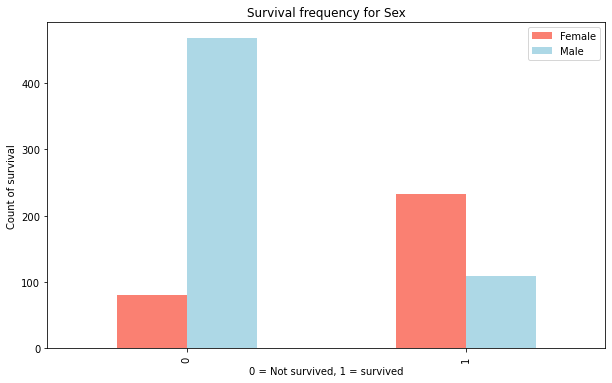

In [9]:
## Let's create a plot for the crosstab
pd.crosstab(df.Survived, df.Sex).plot(kind='bar', color=['salmon', 'lightblue'], figsize = (10,6))

plt.title("Survival frequency for Sex")
plt.xlabel("0 = Not survived, 1 = survived")
plt.ylabel("Count of survival")
plt.legend(['Female', 'Male']);

In [10]:
### Let's compare Pclass column with target
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


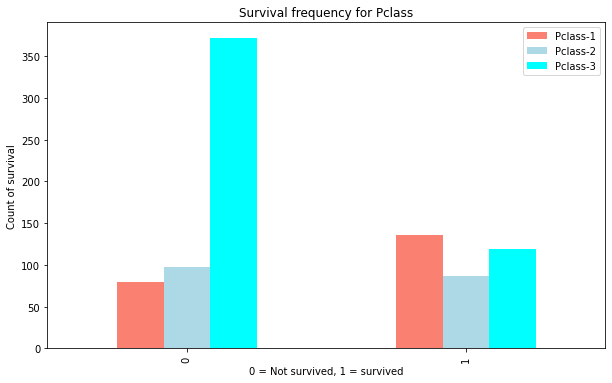

In [11]:
## Let's create a plot for the crosstab
pd.crosstab(df.Survived, df.Pclass).plot(kind='bar', color=['salmon', 'lightblue', 'cyan'], figsize = (10,6))

plt.title("Survival frequency for Pclass")
plt.xlabel("0 = Not survived, 1 = survived")
plt.ylabel("Count of survival")
plt.legend(['Pclass-1','Pclass-2','Pclass-3']);

In [12]:
## Now let's see the overall relations in the dataset (Correlation matrix)

df_corr = df.corr()
df_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


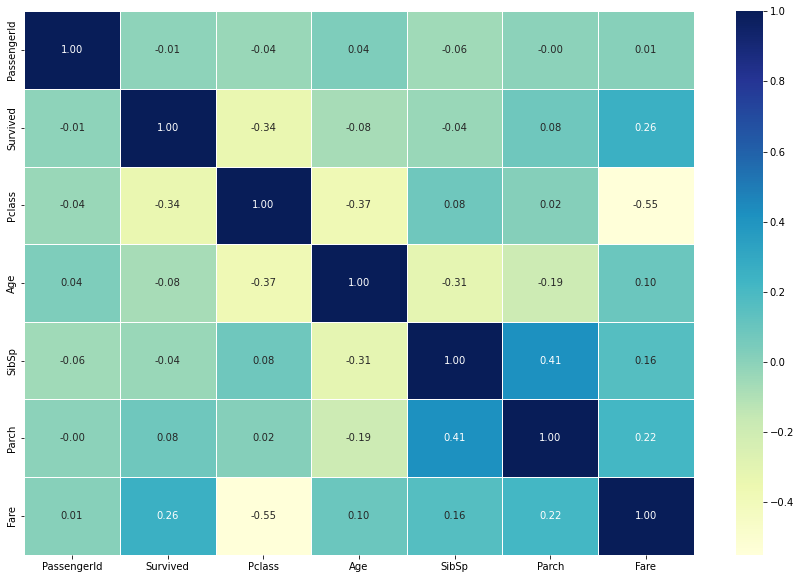

In [13]:
## Let's make the correlation matrix more visual
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(df_corr,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')

#### From the above Correlation heatmap, we can analyze which feature plays a vital role in chance of survivalance

In [14]:
## Let's dela with the missing values

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Let's fill the empty values

In [15]:
## Let's consider the columns with numeric values

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


In [16]:
## Let's check if any numeric column has missing values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age


In [17]:
## We have only one numeric column (Age) with null values, let's fill it with median values

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        
        ## let's take a column to display whether it had null or not(previously)
        df[label+'_is_missing'] = pd.isnull(content)
        
        if pd.isnull(content).sum():
            
             
            
            ## Let's fill missing with median (b'coz median is more robust than mean)
            df[label] = content.fillna(content.median())

In [18]:
## Let's see about missing values

df.isna().sum()

PassengerId                 0
Survived                    0
Pclass                      0
Name                        0
Sex                         0
Age                         0
SibSp                       0
Parch                       0
Ticket                      0
Fare                        0
Cabin                     687
Embarked                    2
PassengerId_is_missing      0
Survived_is_missing         0
Pclass_is_missing           0
Age_is_missing              0
SibSp_is_missing            0
Parch_is_missing            0
Fare_is_missing             0
dtype: int64

In [19]:
## Let's find the columns with null values (string dtype)
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Cabin
Embarked


In [20]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [21]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
## Let's fill/change categorical values

for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
            
        ## Let's place a column to determine whether the values were missing
        df[label+'_is_missing'] = pd.isnull(content)
        
        ## Let's turn categorical values into numericals 
        ## we have to add +1 to the categorical code as for null it gives -1 ( so, we make it 0)
        
        df[label] = pd.Categorical(content).codes + 1

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             891 non-null    int64  
 1   Survived                891 non-null    int64  
 2   Pclass                  891 non-null    int64  
 3   Name                    891 non-null    int16  
 4   Sex                     891 non-null    int8   
 5   Age                     891 non-null    float64
 6   SibSp                   891 non-null    int64  
 7   Parch                   891 non-null    int64  
 8   Ticket                  891 non-null    int16  
 9   Fare                    891 non-null    float64
 10  Cabin                   891 non-null    int16  
 11  Embarked                891 non-null    int8   
 12  PassengerId_is_missing  891 non-null    bool   
 13  Survived_is_missing     891 non-null    bool   
 14  Pclass_is_missing       891 non-null    bo

In [24]:
df.isna().sum()

PassengerId               0
Survived                  0
Pclass                    0
Name                      0
Sex                       0
Age                       0
SibSp                     0
Parch                     0
Ticket                    0
Fare                      0
Cabin                     0
Embarked                  0
PassengerId_is_missing    0
Survived_is_missing       0
Pclass_is_missing         0
Age_is_missing            0
SibSp_is_missing          0
Parch_is_missing          0
Fare_is_missing           0
Name_is_missing           0
Sex_is_missing            0
Ticket_is_missing         0
Cabin_is_missing          0
Embarked_is_missing       0
dtype: int64

In [25]:
df = df.drop('Survived_is_missing', axis=1)

### Now we got a well cleaned dataset

In [26]:
#3 Let's split into x and y

x = df.drop('Survived', axis=1)
y = df.Survived

## Let's split the data into train and valid sets
np.random.seed(25)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [27]:
## let's try with RandomForestClassifier

clf = RandomForestClassifier()

In [28]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
clf.score(x_train, y_train)

1.0

In [30]:
## let's check accuracy for the validation set

clf.score(x_test, y_test)

0.8100558659217877

## Let's Tune the model to gain better results

In [31]:
## Hyperparameters dictionary

rfc_h = {'n_estimators': np.arange(5, 101, 5),
         'max_depth': [None, 3, 5, 7],
         'min_samples_split': np.arange(2, 20, 2)}

In [32]:
## Let's use Grid Search

rf_gs = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                     param_grid = rfc_h,
                     cv=5)

In [33]:
%%time
rf_gs.fit(x_train, y_train)

CPU times: total: 6min 5s
Wall time: 7min 27s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None, 3, 5, 7],
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100])})

In [34]:
rf_gs.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

In [35]:
rf_gs.score(x_test, y_test)

0.8324022346368715

## Let's evaluate our model

In [36]:
y_preds = rf_gs.predict(x_test)

In [37]:
y_preds

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

C:\Users\harsh\Desktop\Titanic\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


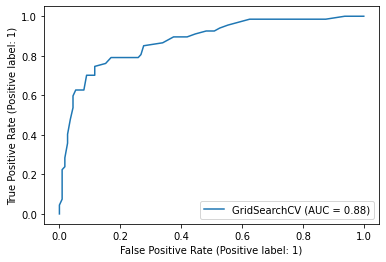

In [38]:
# Plot ROC curve and claculate AUC metric
plot_roc_curve(rf_gs, x_test, y_test);

In [39]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[99 13]
 [17 50]]


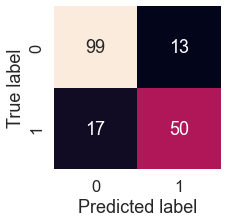

In [40]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel("Predicted label") # Predictions go to the x-axis
    plt.ylabel("True label") # true labels go to the y-axis
    
plot_conf_mat(y_test, y_preds)

In [41]:
## Let's analyze different metrics with "Classification Report"

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       112
           1       0.79      0.75      0.77        67

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



## Now let's take test data

In [42]:
dft = pd.read_csv('data/test.csv')

In [43]:
dft

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Let's perform all the methods, that we used for train set to clean the test dataset

In [44]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [45]:
dft.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [46]:
## We have only one numeric column (Age) with null values, let's fill it with median values

for label, content in dft.items():
    if pd.api.types.is_numeric_dtype(content):
        
        ## let's take a column to display whether it had null or not(previously)
        
        dft[label+'_is_missing'] = pd.isnull(content)
        
        if pd.isnull(content).sum():
            
            ## Let's fill missing with median (b'coz median is more robust than mean)
            dft[label] = content.fillna(content.median())

In [47]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             418 non-null    int64  
 1   Pclass                  418 non-null    int64  
 2   Name                    418 non-null    object 
 3   Sex                     418 non-null    object 
 4   Age                     418 non-null    float64
 5   SibSp                   418 non-null    int64  
 6   Parch                   418 non-null    int64  
 7   Ticket                  418 non-null    object 
 8   Fare                    418 non-null    float64
 9   Cabin                   91 non-null     object 
 10  Embarked                418 non-null    object 
 11  PassengerId_is_missing  418 non-null    bool   
 12  Pclass_is_missing       418 non-null    bool   
 13  Age_is_missing          418 non-null    bool   
 14  SibSp_is_missing        418 non-null    bo

In [48]:
## Let's fill/change categorical values

for label, content in dft.items():
    if not pd.api.types.is_numeric_dtype(content):
            
        ## Let's place a column to determine whether the values were missing
        
        dft[label+'_is_missing'] = pd.isnull(content)
        
        ## Let's turn categorical values into numericals 
        ## we have to add +1 to the categorical code as for null it gives -1 ( so, we make it 0)
        
        dft[label] = pd.Categorical(content).codes + 1

#### Here, even we don't have any null values in dft['Embarked'], we need to add "Embarked_is_missing" to make the features of test set same as that of the train set

In [49]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             418 non-null    int64  
 1   Pclass                  418 non-null    int64  
 2   Name                    418 non-null    int16  
 3   Sex                     418 non-null    int8   
 4   Age                     418 non-null    float64
 5   SibSp                   418 non-null    int64  
 6   Parch                   418 non-null    int64  
 7   Ticket                  418 non-null    int16  
 8   Fare                    418 non-null    float64
 9   Cabin                   418 non-null    int8   
 10  Embarked                418 non-null    int8   
 11  PassengerId_is_missing  418 non-null    bool   
 12  Pclass_is_missing       418 non-null    bool   
 13  Age_is_missing          418 non-null    bool   
 14  SibSp_is_missing        418 non-null    bo

## Let's make predictions for the test set

In [50]:
test_preds = rf_gs.predict(dft)

In [51]:
test_preds

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [52]:
Prediction = pd.DataFrame()

In [53]:
Prediction['PassengerId'] = dft['PassengerId']
Prediction['Survived'] = test_preds

In [54]:
Prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
